**PREPOCESSING THE DATA**

FOR THE REGIONS (N)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('cluster_map')
df

# Make a dictionary of region ids corresponding to region hash
cluster_dict = {}
n = 0

with open('cluster_map') as f:
    for line in f:
        region_hash, region_id = line.strip().split('\t')
        cluster_dict[region_hash] = region_id
        n = n + 1
    

#Total number of regions
print("Total no. of regions: ", n)
print(cluster_dict)

Total no. of regions:  66
{'90c5a34f06ac86aee0fd70e2adce7d8a': '1', 'f2c8c4bb99e6377d21de71275afd6cd2': '2', '58c7a4888306d8ff3a641d1c0feccbe3': '3', 'b26a240205c852804ff8758628c0a86a': '4', '4b9e4cf2fbdc8281b8a1f9f12b80ce4d': '5', '1cbfbdd079ef93e74405c53fcfff8567': '6', '929ec6c160e6f52c20a4217c7978f681': '7', '82cc4851f9e4faa4e54309f8bb73fd7c': '8', 'b702e920dcd2765e624dc1ce3a770512': '9', '4f4041f7db0c7f69892d9b74c1a7efa1': '10', 'dd8d3b9665536d6e05b29c2648c0e69a': '11', '74c1c25f4b283fa74a5514307b0d0278': '12', '4b7f6f4e2bf237b6cc58f57142bea5c0': '13', '2920ece99323b4c111d6f9affc7ea034': '14', 'd5cb17978de290c56e84c9cf97e63186': '15', '307afa4120c590b3a46cf4ff5415608a': '16', 'a814069db8d32f0fa6e188f41059c6e1': '17', '2350be163432e42270d2670cb3c02f80': '18', 'a5609739c6b5c2719a3752327c5e33a7': '19', '91690261186ae5bee8f83808ea1e4a01': '20', '364bf755f9b270f0f9141d1a61de43ee': '21', '87285a66236346350541b8815c5fae94': '22', '4725c39a5e5f4c188d382da3910b3f3f': '23', '38d5ad2d22b6110

In [ ]:
#PREPROCESSING POI DATA

import pandas as pd

# read the file

df = pd.read_csv('poi_data', names = list(range(0,152)), delimiter='\t')

#df = df.rename(columns={'0': 'Region_hash'})
# Changong region hash to region ids
df['Region_hash'] = df[0].map(cluster_dict)

del df[0]
df['POI_Class'] = df.iloc[:, 0:151].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

#sorted_df = df.sort_values('Region_hash', ascending=True)
df = df.drop(df.columns[0:151], axis=1)


# Save the combined dataframe to a CSV file
df.to_csv('poi.csv', index=False)

#sorted_df
df

,Region_hash,POI_Class
0,12,"1#11:2241,1#10:249,24:1245,25:3652,20:33449,22..."
1,43,"20#7:249,20#5:83,2#7:166,20#2:747,20#1:996,16#..."
2,13,"4#16:249,24:913,25:332,20:4316,22:415,4:2158,5..."
3,17,"1#11:498,24:332,25:581,20:5810,22:2407,4:1494,..."
4,44,"20#7:581,20#5:83,20#4:415,20#2:166,20#1:664,16..."
...,...,...
61,51,"4#16:1577,1#10:332,24:3486,25:15272,20:197125,..."
62,8,"4#16:498,1#10:830,24:6308,25:4897,20:56440,22:..."
63,32,"20#7:1494,20#5:249,20#4:1660,8#4:747,20#1:1494..."
64,37,"4#16:166,1#10:332,24:1411,25:1826,20:37433,22:..."


In [ ]:
import pandas as pd

# read the file
df = pd.read_csv('poi_data', names=list(range(0, 152)), delimiter='\t')

# Changong region hash to region ids
df['Region_hash'] = df[0].map(cluster_dict)
del df[0]

# Count the number of non-null values in each column and store in a list
poi_class_counts = df.iloc[:, 0:151].count(axis=1).tolist()

# Join non-null values in each row to create POI_Class column
df['POI_Class'] = df.iloc[:, 0:151].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

# Add POI_Class_Count column
df['POI_Class_Count'] = poi_class_counts


#sorted_df = df.sort_values('Region_hash', ascending=True)
df = df.drop(df.columns[0:151], axis=1)

# Save the combined dataframe to a CSV file
df.to_csv('poi_c.csv', index=False)

df

,Region_hash,POI_Class,POI_Class_Count
0,12,"1#11:2241,1#10:249,24:1245,25:3652,20:33449,22...",138
1,43,"20#7:249,20#5:83,2#7:166,20#2:747,20#1:996,16#...",79
2,13,"4#16:249,24:913,25:332,20:4316,22:415,4:2158,5...",101
3,17,"1#11:498,24:332,25:581,20:5810,22:2407,4:1494,...",96
4,44,"20#7:581,20#5:83,20#4:415,20#2:166,20#1:664,16...",68
...,...,...,...
61,51,"4#16:1577,1#10:332,24:3486,25:15272,20:197125,...",151
62,8,"4#16:498,1#10:830,24:6308,25:4897,20:56440,22:...",143
63,32,"20#7:1494,20#5:249,20#4:1660,8#4:747,20#1:1494...",78
64,37,"4#16:166,1#10:332,24:1411,25:1826,20:37433,22:...",138


FOR TIMESLOTS (Q)

In [ ]:
#24*60/10 = 144 timeslots each day
q = 144
# create the timeslots list of ranges
timeslots = []
for i in range(144):
    start = f"{i*10 // 60:02d}:{i*10 % 60:02d}:00"
    end = f"{i*10 // 60:02d}:{i*10 % 60 + 9:02d}:59"
    timeslots.append((start, end))


In [ ]:
#Prepocessing of WEATHER data

# Define the filenames of the weather data files
file_names = ['weather_data_2016-01-23_test', 'weather_data_2016-01-25_test', 'weather_data_2016-01-27_test', 'weather_data_2016-01-29_test', 'weather_data_2016-01-31_test']
'''
file_names = ['weather_data_2016-01-01', 'weather_data_2016-01-02', 'weather_data_2016-01-03', 
              'weather_data_2016-01-04', 'weather_data_2016-01-05', 'weather_data_2016-01-06', 
              'weather_data_2016-01-07', 'weather_data_2016-01-08','weather_data_2016-01-09',
              'weather_data_2016-01-10', 'weather_data_2016-01-11', 'weather_data_2016-01-12', 
              'weather_data_2016-01-13', 'weather_data_2016-01-14', 'weather_data_2016-01-15', 
              'weather_data_2016-01-16', 'weather_data_2016-01-17','weather_data_2016-01-18',
              'weather_data_2016-01-19', 'weather_data_2016-01-20','weather_data_2016-01-21']
'''
# Initialize an empty list to store the dataframes of all files
dfs = []

# Loop through each file name and read the file into a dataframe, with column names 'data'
for file_name in file_names:
    df = pd.read_csv(file_name, names=['DateTime', 'Weather', 'Temperature', 'Humidity'], delimiter='\t')
    df = df.astype(str)

    df[['Date', 'Time']] = df['DateTime'].str.split(' ', expand=True)
    del df['DateTime']
    #del df['Humidity']
    #del df['Temperature']


    # Convert Time column to TimeSlot column
    df['TimeSlot(tj)'] = None
    # Check in what range
    for i, (start, end) in enumerate(timeslots, start=1):
        df.loc[(df['Time'] >= start) & (df['Time'] <= end), 'TimeSlot(tj)'] = i

    del df['Time']
    #del df['Date']
    dfs.append(df)


# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a CSV file
combined_df.to_csv('weather_test.csv', index=False)

#ddf = pd.read_csv('weather_data.csv')

# Print the combined dataframe
print(combined_df)


   Weather Temperature Humidity        Date TimeSlot(tj)
0        4         1.0       94  2016-01-23           43
1        3        -1.0      107  2016-01-23           68
2        3        -1.0       56  2016-01-23           80
3        3         0.0       48  2016-01-23           91
4        3         0.0       48  2016-01-23           92
..     ...         ...      ...         ...          ...
82       6         1.0       75  2016-01-31          128
83       8         1.0       75  2016-01-31          129
84       8         1.0       69  2016-01-31          139
85       8         1.0       69  2016-01-31          140
86       8         1.0       69  2016-01-31          141

[87 rows x 5 columns]


In [ ]:
# PREPROCESSING ORDER DATA TEST


cols = ['Order Request', 'Driver Answer', 'Region_hash', 'PassengerID',  'DateTime']
file_names = ['test_order_data_2016-01-23', 'test_order_data_2016-01-25', 'test_order_data_2016-01-27', 
              'test_order_data_2016-01-29', 'test_order_data_2016-01-31']


combined_df = pd.DataFrame(columns=cols)
dfs = []


num_null = 0 
# Loop through each file name and read the file into a dataframe
for file_name in file_names:
    # read the file
    
    df = pd.read_csv(file_name, names=cols, delimiter=',')

    df[['Date', 'Time']] = df['DateTime'].str.split(' ', expand=True)

    null_mask = df['Driver Answer'].isnull()
    num_null += null_mask.sum()

    
    # replace null values with 0 and non-null values with 1 in Order Id and Driver Id columns
    df['Order Request'] = df['Order Request'].notnull().astype(int)
    
    df['Driver Answer'] = df['Driver Answer'].notnull().astype(int)
    
    # append the data to the combined dataframe
    dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Convert Time column to TimeSlot column
combined_df['TimeSlot(tj)'] = None
# Check in what range
for i, (start, end) in enumerate(timeslots, start=1):
    combined_df.loc[(combined_df['Time'] >= start) & (combined_df['Time'] <= end), 'TimeSlot(tj)'] = i


# Deleting unnecessary columns
del combined_df['PassengerID']
del combined_df['DateTime']
del combined_df['Time']


# Changong region hash to region ids
combined_df['Region_hash'] = combined_df['Region_hash'].map(cluster_dict)


# write the combined data to a csv file
combined_df.to_csv('order_test.csv', index=False)
#df = pd.read_csv('order_test.csv')
print(combined_df)
print ("Num null: ", num_null)

                                     Demand(rij)  Supply(aij)
TimeSlot(tj) Region_hash Date                                
43           1           2016-01-23           64           64
                         2016-01-27           94           94
                         2016-01-31           55           55
             10          2016-01-23            1            1
                         2016-01-31            1            1
...                                          ...          ...
141          9           2016-01-23           23           23
                         2016-01-25           20           20
                         2016-01-27           19           19
                         2016-01-29           16           16
                         2016-01-31           11           11

[7890 rows x 2 columns]
Num null:  0


In [ ]:
# PREPROCESSING ORDER DATA TRAIN

import pandas as pd


cols = ['Order Request', 'Driver Answer', 'PassengerID', 'Region_hash', 'Region_end', 'Price', 'DateTime']

#Take subset of data else doesn't work
file_names = ['order_data_2016-01-01', 'order_data_2016-01-02', 'order_data_2016-01-03', 
              'order_data_2016-01-04', 'order_data_2016-01-05', 'order_data_2016-01-06', 
             # 'order_data_2016-01-07', 'order_data_2016-01-08','order_data_2016-01-09',
             # 'order_data_2016-01-10', 'order_data_2016-01-11', 'order_data_2016-01-12', 
             # 'order_data_2016-01-13', 'order_data_2016-01-14', 'order_data_2016-01-15', 
              'order_data_2016-01-16', 'order_data_2016-01-17','order_data_2016-01-18',
              'order_data_2016-01-19', 'order_data_2016-01-20','order_data_2016-01-21'
              ]

combined_df = pd.DataFrame(columns=cols)
dfs = []


num_null = 0 
# Loop through each file name and read the file into a dataframe, with column names 'data'
for file_name in file_names:
    # read the file
    df = pd.read_csv(file_name, delimiter='\t', names=['Order Request', 'Driver Answer', 'PassengerID', 'Region_hash', 'Region_end', 'Price', 'DateTime'], na_values='NULL', keep_default_na=False)

     # set the column names
    num_cols = len(df.columns)
    if num_cols < len(cols):
        for i in range(num_cols, len(cols)):
            df[i] = np.nan
        df.columns = cols[:num_cols] + cols[num_cols:]
    else:
        df.columns = cols
    
    df[['Date', 'Time']] = df['DateTime'].str.split(' ', expand=True)

    null_mask = df['Driver Answer'].isnull()
    num_null += null_mask.sum()
    
    # replace null values with 0 and non-null values with 1 in Order Id and Driver Id columns
    df['Order Request'] = df['Order Request'].notnull().astype(int)


    df['Driver Answer'] = df['Driver Answer'].notnull().astype(int)
    
    # append the data to the combined dataframe
    dfs.append(df)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Convert Time column to TimeSlot column
combined_df['TimeSlot(tj)'] = None
# Check in what range
for i, (start, end) in enumerate(timeslots, start=1):
    combined_df.loc[(combined_df['Time'] >= start) & (combined_df['Time'] <= end), 'TimeSlot(tj)'] = i


# Deleting unnecessary columns (that are not present in test data)
del combined_df['PassengerID']
del combined_df['DateTime']
del combined_df['Price']
del combined_df['Time']
del combined_df['Region_end']


# Changong region hash to region ids
combined_df['Region_hash'] = combined_df['Region_hash'].map(cluster_dict)



# write the combined data to a csv file
combined_df.to_csv('order_train_subset.csv', index=False)

print(combined_df)
print ("Num null: ", num_null)

         Order Request  Driver Answer Region_hash        Date TimeSlot(tj)
0                    1              1          23  2016-01-01           82
1                    1              1           8  2016-01-01           59
2                    1              1          32  2016-01-01          111
3                    1              1          13  2016-01-01          134
4                    1              0          27  2016-01-01          103
...                ...            ...         ...         ...          ...
3513761              1              1           9  2016-01-18          102
3513762              1              1          27  2016-01-18          112
3513763              1              1           8  2016-01-18           96
3513764              1              1          37  2016-01-18          128
3513765              1              1          21  2016-01-18           55

[3513766 rows x 5 columns]
Num null:  635321


Utility

In [ ]:
import os

filename = 'order_train.csv'
size_kb = os.path.getsize(filename) / 1024
print(f'The size of {filename} is {size_kb:.2f} KB')

The size of order_train.csv is 176506.44 KB


**DENORMALISING THE FILE**





In [ ]:
import pandas as pd
# Use same code to create training and testing file

# Read the ordee data
#take subset, 2000 for test, 5000 for training
order_df = pd.read_csv("1order_test.csv")
#order_df = order_df.tail(2000)

# Read the poi data
poi_df = pd.read_csv("poi_c.csv")

# Read the weather data
weather_df = pd.read_csv("weather_test.csv")

# Merge ordery data with poi data
merged_df = pd.merge(order_df, poi_df, on="Region_hash")

# Merge the merged_df with weather data
merged_df = pd.merge(merged_df, weather_df, on=["Date", "TimeSlot(tj)"])

# Save the merged data to a CSV file
#merged_df.to_csv("train_data.csv", index=False)


#Convert to date-timeslot format
merged_df['TimeSlot'] = merged_df['Date'].astype(str) + '-' + merged_df['TimeSlot(tj)'].astype(int).apply(lambda x: str(x).zfill(3))
#print(merged_df)

#Deleet extra cols
del merged_df['TimeSlot(tj)']
del merged_df['Date']

# Define a function to concatenate strings in a 
def concat_strings(ser):
    return '|'.join([str(i) for i in ser])

# Group data by TimeSlot(tj) and Region_hash and aggregate all columns
grouped_data = merged_df.groupby(['TimeSlot', 'Region_hash']).agg({
    'Order Request': 'count', 
    'Driver Answer': 'sum', 
    'Weather': 'max', 
    'Temperature': 'mean', 
    'Humidity': 'mean',
    'POI_Class_Count': 'sum',
    'POI_Class': concat_strings
}).reset_index()



# Rename columns of demand supply
grouped_data = grouped_data.rename(columns={'Order Request': 'Demand(rij)', 'Driver Answer': 'Supply(aij)'})



# create a new column 'gap' thats the demand-supply gap
grouped_data['gap(ij)'] = grouped_data['Demand(rij)'] - grouped_data['Supply(aij)']

# Save the merged data to a CSV file
#grouped_data.to_csv("testing_data.csv", index=False)

grouped_data

,TimeSlot,Region_hash,Demand(rij),Supply(aij),Weather,Temperature,Humidity,POI_Class_Count,POI_Class,gap(ij)
0,2016-01-23-043,1,64,64,4,1.0,94.0,8128,"4#16:415,1#10:498,24:2324,25:1245,20:26394,22:...",0
1,2016-01-23-043,2,5,5,4,1.0,94.0,630,"4#16:166,24:83,25:581,20:24153,22:1411,23:166,...",0
2,2016-01-23-043,3,2,2,4,1.0,94.0,152,"20#7:830,20#4:166,20#2:166,20#1:1577,16#12:166...",0
3,2016-01-23-043,4,21,21,4,1.0,94.0,2478,"4#16:249,1#10:83,24:581,25:747,20:11122,22:830...",0
4,2016-01-23-043,5,1,1,4,1.0,94.0,75,"20#7:581,20#5:166,20#4:83,8#4:332,20#1:332,16#...",0
...,...,...,...,...,...,...,...,...,...,...
5263,2016-01-31-141,57,9,9,8,1.0,69.0,1062,"1#10:83,24:249,25:332,20:5312,22:664,23:166,4:...",0
5264,2016-01-31-141,59,2,2,8,1.0,69.0,176,"1#11:83,1#10:83,24:166,25:332,20:1826,22:332,4...",0
5265,2016-01-31-141,61,1,1,8,1.0,69.0,105,"1#11:415,4#17:166,25:498,20:4399,22:249,4:996,...",0
5266,2016-01-31-141,64,5,5,8,1.0,69.0,600,"4#16:249,24:249,25:1162,20:19422,22:1245,23:33...",0


**MAKING PREDICTIONS**


> Comparing different regression techniques to obtain the best results



In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import LabelEncoder


# Getting the training abd testing data
train_data = pd.read_csv('training_again_data.csv')
test_data = pd.read_csv('testing_again_data.csv')

# For Rolling window concept
window_size = 6

# Models to compare
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

# Setting the data of POI Class
le = LabelEncoder()

train_data['POI_Class'] = le.fit_transform(train_data['POI_Class'])
test_data['POI_Class'] = le.fit_transform(test_data['POI_Class'])



# Train and test  models using with rolling window approach
results = {}
for model in models:
    model_name = model.__class__.__name__
    print('Training and testing', model_name)
    predictions = []
    for i in range(window_size, len(train_data)):
        # Take part of data of window size
        part = train_data[i-window_size:i]

        # the features and target variable
        X = part[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']]
        y = part['gap(ij)']

        # Fit model for part of data
        model.fit(X, y)

        # for next pred
        next_X = train_data.loc[[i], ['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']]
        next_prediction = model.predict(next_X)[0]

        # Save current pred
        predictions.append(next_prediction)

    # Evaluate model with test df
    test_predictions = []
    for i in range(window_size, len(test_data)):
        # Select the curr part of data
        part = test_data[i-window_size:i]

        # the features and target variable
        X = part[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']]
        y = part['gap(ij)']

        # Make prediction for the next 
        next_X = test_data.loc[[i], ['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']]
        next_prediction = model.predict(next_X)[0]

        # Save  prediction
        test_predictions.append(next_prediction)

    # Now we see mean abs error
    train_minae = mean_absolute_error(train_data['gap(ij)'][window_size:], predictions)
    test_minae = mean_absolute_error(test_data['gap(ij)'][window_size:], test_predictions)

    # Final results with model
    results[model_name] = {'train_minae': train_minae, 'test_minae': test_minae}

# Print  results
for model_name, result in results.items():
    print(model_name, ' ->  train MAE:', result['train_minae'], ' test MAE:', result['test_minae'])

# Best model evaluated with test data
best_model = min(results, key=lambda x: results[x]['test_minae'])

print()
print('Best model:', best_model)

Training and testing LinearRegression
Training and testing Ridge
Training and testing Lasso


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

Training and testing RandomForestRegressor
LinearRegression  ->  train MAE: 1.6549086093523702  test MAE: 2.082374504579769
Ridge  ->  train MAE: 1.6269724174562423  test MAE: 2.0822985673157954
Lasso  ->  train MAE: 1.6291042155285271  test MAE: 2.0711827995661114
RandomForestRegressor  ->  train MAE: 1.6227966208747828  test MAE: 0.7423318385650225

Best model: RandomForestRegressor


**MODEL OPTIMISATION**


> To optimize the best model, RandomForestRegressor, we can use a technique called grid search cross-validation, which involves searching over a range of hyperparameter (no. of trees in forest and max depth)



In [13]:
from sklearn.model_selection import GridSearchCV

# Range of hyperparas to
params = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [10, 20, 30]
}

# For grid search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=params,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# training data is fit to the grid search
grid_search.fit(train_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']].values, train_data['gap(ij)'].values)

# Display best parameters and MAE
print('Best hyperparameters:', grid_search.best_params_)
print('Best mean absolute error:', -grid_search.best_score_)


Best hyperparameters: {'max_depth': 10, 'n_estimators': 1000}
Best mean absolute error: 1.3173541417389545


**MODEL TESTING AND EVALUATION**


> We first train the optimized model on the entire training data using the hyperparameters that gave the best performance. We then use this model to make predictions on the test data and evaluate its performance using mean absolute error (MAE).



In [33]:
# Now optimized model in trained on all training data
X_train = train_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']]
y_train = train_data['gap(ij)']
opti_mod = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features='sqrt', max_depth=10, bootstrap=False, random_state=42)
opti_mod.fit(X_train, y_train)

# Make predictions on  test data
X_test = test_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']]
y_test = test_data['gap(ij)']
y_pred = opti_mod.predict(X_test)

# Evaluate model performance with MAE
test_mae = mean_absolute_error(y_test, y_pred)
print('Test MAE:', test_mae)


Test MAE: 0.7824856096100892


**PLOTTING LEARNING CURVE AND ERROR CURVE**



> The learning curve shows how the model's performance improves with increasing amount of training data. The training error and validation error are plotted against the number of training examples. We want to see the training and validation errors converge to a small value, indicating that the model is not overfitting or underfitting.






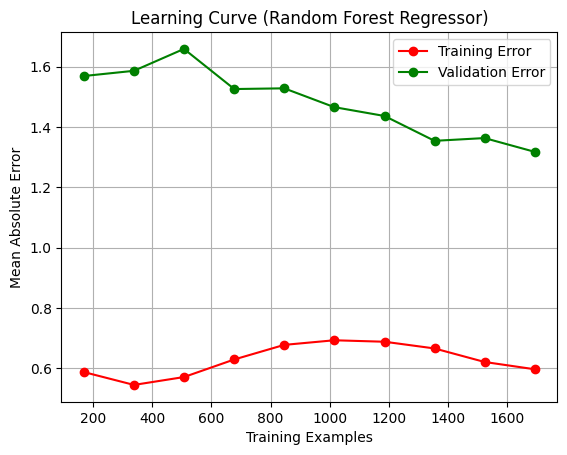

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, r2_score

# Define the best hyperparameters
best_n_estimators = 1000
best_max_depth = 10


# New random forest regressor with obtained best hyperparameters
best_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# fitting this best model on training data
best_model.fit(train_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']].values, train_data['gap(ij)'].values)

# Predictions on test data
y_pred = best_model.predict(test_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']].values)

# Ploting learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, 
    train_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']].values, 
    train_data['gap(ij)'].values, 
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.title('Learning Curve (Random Forest Regressor)')
plt.xlabel('Training Examples')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.plot(train_sizes, -np.mean(train_scores, axis=1), 'o-', color='r', label='Training Error')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), 'o-', color='g', label='Validation Error')
plt.legend(loc='best')
plt.show()


**Analysis**

> We see that the gap between the training and validation error is decreasing (converging) as the graph moves forward. However, due to the limited amount of data (as we used the subset of training data because of memory issues), we are unable to see the gap completely enclosing. Nonetheless, from the trend observed, we can conclude that the graph is making it's way towards the best fit.


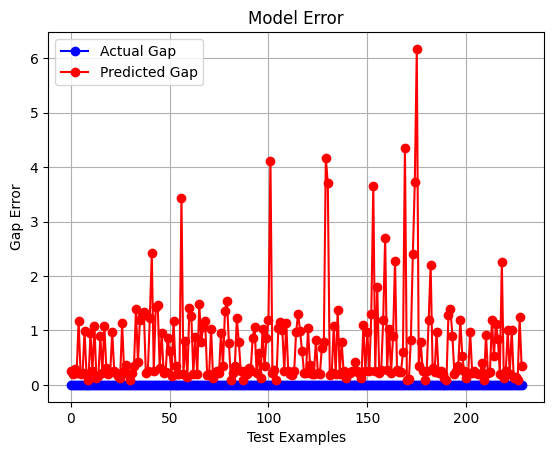

In [39]:
# best model test error
test_predictions = best_model.predict(test_data[['Weather', 'Temperature', 'Humidity', 'POI_Class', 'POI_Class_Count']].values)
test_error = mean_absolute_error(test_data['gap(ij)'].values, test_predictions)

# Ploting error
plt.figure()
plt.title('Model Error')
plt.xlabel('Test Examples')
plt.ylabel('Gap Error')
plt.grid()
plt.plot(range(len(test_data)), test_data['gap(ij)'].values, 'o-', color='b', label='Actual Gap')
plt.plot(range(len(test_data)), test_predictions, 'o-', color='r', label='Predicted Gap')
plt.legend(loc='best')
plt.show()


**Analysis**


> We see a lot of noise in the error curve. The primary reason is that in the training data, the gap had a wide range of values, whereas the test data has the gap 0 for all examples. 

